In [1]:
#importing required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import L2
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [16]:
train = pd.read_csv(r"data\train.csv")
test = pd.read_csv(r'data\test.csv')

In [17]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
train.shape

(42000, 785)

In [20]:
X = train.drop("label", axis=1) 
y = train.label

In [21]:
# Normalize the data (scale pixel values between 0 and 1)
X = X / 255.0
X_test = test / 255.0

In [22]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# function to unflatten row:

def unflatten(row):
    return row.reshape((28, 28))

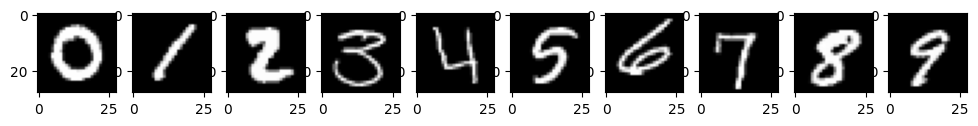

In [10]:
# plotting some digits

plt.figure(figsize=(12, 120))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.imshow(unflatten(train[train['label'] == i - 1].iloc[0, 1:].values), cmap='gray')

In [11]:
#splitting to train and test set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

### Dense Neural Network

In [12]:
# Define a deeper and more complex model
model = Sequential([
    Dense(units=512, activation='relu', kernel_regularizer=L2(0.001)),  # Increased units
    Dropout(0.4),  # Add dropout to prevent overfitting
    Dense(units=256, activation='relu', kernel_regularizer=L2(0.001)),
    Dropout(0.4),
    Dense(units=128, activation='relu', kernel_regularizer=L2(0.001)),
    Dropout(0.3),
    Dense(units=64, activation='relu', kernel_regularizer=L2(0.001)),
    Dropout(0.3),
    Dense(units=32, activation='relu', kernel_regularizer=L2(0.001)),
    Dense(units=10, activation='softmax', kernel_regularizer=L2(0.001))  
])

In [13]:
# Compile the model with an Adam optimizer and metrics
model.compile(
    optimizer=Adam(learning_rate=5e-5),  # Reduced learning rate for better convergence
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [14]:
# Train the model
model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val)) 

Epoch 1/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.2303 - loss: 3.2732 - val_accuracy: 0.7764 - val_loss: 1.7361
Epoch 2/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6675 - loss: 1.9266 - val_accuracy: 0.8631 - val_loss: 1.3695
Epoch 3/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7917 - loss: 1.5281 - val_accuracy: 0.8979 - val_loss: 1.1903
Epoch 4/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8516 - loss: 1.3194 - val_accuracy: 0.9183 - val_loss: 1.0794
Epoch 5/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8881 - loss: 1.1816 - val_accuracy: 0.9333 - val_loss: 0.9901
Epoch 6/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9082 - loss: 1.0749 - val_accuracy: 0.9369 - val_loss: 0.9239
Epoch 7/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9189 - loss: 0.9867 - val_accuracy: 0.9429 - val_loss: 0.8645
Epoch 8/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9311 - loss: 0.9197 -

### CNN Model

In [23]:
# Convert DataFrames to NumPy arrays
X_train = X_train.to_numpy().reshape(-1, 28, 28, 1)
X_val = X_val.to_numpy().reshape(-1, 28, 28, 1)
X_test = X_test.to_numpy().reshape(-1, 28, 28, 1)

In [24]:
# Define a model with Conv2D layers
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding = 'Same', kernel_regularizer=L2(0.0001), input_shape=(28, 28, 1)),    # First conv layer
    MaxPooling2D(pool_size=(2, 2)),   # Pooling layer
    Dropout(0.2),  # Dropout to reduce overfitting
    
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same', kernel_regularizer=L2(0.0001)),  # Second conv layer
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding = 'Same', kernel_regularizer=L2(0.0001)),   # Third conv layer
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    Flatten(),    # Flatten the output for dense layers
    Dense(64, activation='relu', kernel_regularizer=L2(0.0001)),  # Fully connected layer
    Dropout(0.2),
    Dense(10, activation='softmax')  # Output layer
])

In [25]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),   
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [26]:
# Train the model
model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))  

Epoch 1/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4673 - loss: 1.5768 - val_accuracy: 0.9386 - val_loss: 0.2414
Epoch 2/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.9020 - loss: 0.3407 - val_accuracy: 0.9638 - val_loss: 0.1602
Epoch 3/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9366 - loss: 0.2367 - val_accuracy: 0.9705 - val_loss: 0.1322
Epoch 4/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9483 - loss: 0.1988 - val_accuracy: 0.9757 - val_loss: 0.1145
Epoch 5/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.9563 - loss: 0.1707 - val_accuracy: 0.9762 - val_loss: 0.1050
Epoch 6/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9614 - loss: 0.1506 - val_accuracy: 0.9788 - val_loss: 0.0955
Epoch 7/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9689 - loss: 0.1348 - val_accuracy: 0.9829 - val_loss: 0.0857
Epoch 8/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9694 - los

### Data Augmentation

In [28]:
datagen = ImageDataGenerator(
        rotation_range=5,         # Randomly rotate images by up to 5 degrees
        zoom_range=0.1,            # Randomly zoom images by up to 10%
        width_shift_range=0.1,     # Randomly shift images horizontally by up to 10% of width
        height_shift_range=0.1,    # Randomly shift images vertically by up to 10% of height
)

datagen.fit(X_train)

In [29]:
# Define a more complex model with adjusted architecture
model = Sequential([
    # First convolutional block
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same', kernel_regularizer=L2(0.0001), input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    # Second convolutional block
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding = 'Same', kernel_regularizer=L2(0.0001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    # Third convolutional block
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding = 'Same', kernel_regularizer=L2(0.0001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),
    
    # Flatten and fully connected layers
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=L2(0.0001)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=L2(0.0001)),
    Dropout(0.3),
    
    # Output layer for classification
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=50,   
                    validation_data=(X_val, y_val))

Epoch 1/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.2501 - loss: 2.3858 - val_accuracy: 0.9224 - val_loss: 0.4104
Epoch 2/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 36s 30ms/step - accuracy: 0.7257 - loss: 0.9129 - val_accuracy: 0.9564 - val_loss: 0.2113
Epoch 3/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 34s 29ms/step - accuracy: 0.8601 - loss: 0.5265 - val_accuracy: 0.9695 - val_loss: 0.1623
Epoch 4/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 35s 29ms/step - accuracy: 0.9023 - loss: 0.3991 - val_accuracy: 0.9738 - val_loss: 0.1504
Epoch 5/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 33s 28ms/step - accuracy: 0.9258 - loss: 0.3202 - val_accuracy: 0.9776 - val_loss: 0.1396
Epoch 6/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 35s 30ms/step - accuracy: 0.9402 - loss: 0.2802 - val_accuracy: 0.9829 - val_loss: 0.1207
Epoch 7/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 35s 29ms/step - accuracy: 0.9477 - loss: 0.2521 - val_accuracy: 0.9883 - val_loss: 0.1032
Epoch 8/50
1182/1182 ━━━━━━━━━━━━━━━━━━━━ 35s 29ms/step - accuracy: 0.9555 -

### Model Evaluation

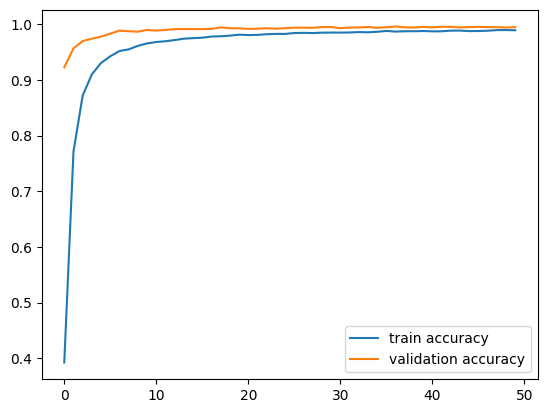

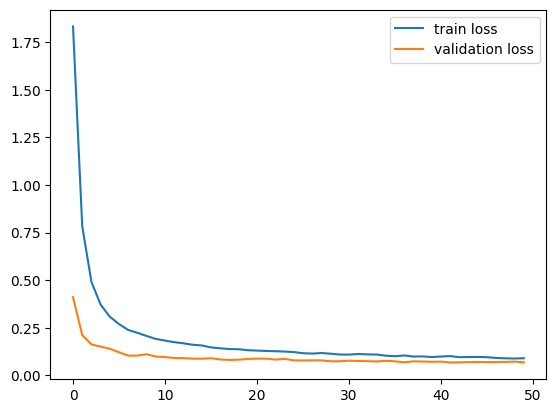

In [30]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


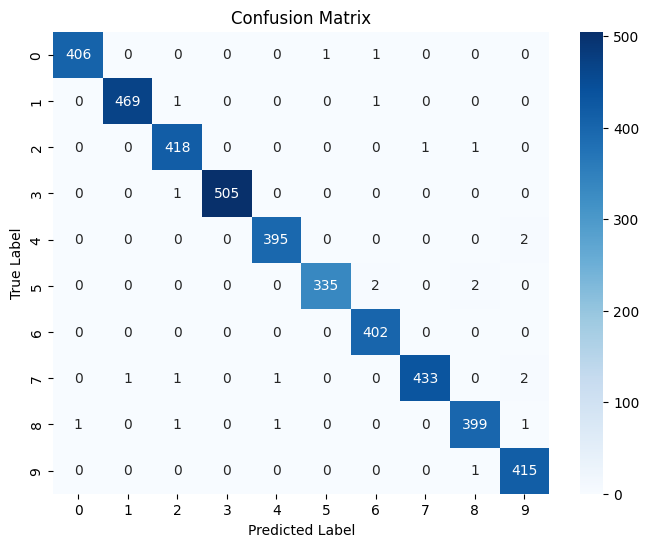

In [31]:
# confusion matrix

# 1. Make predictions on the validation or test set
y_pred_probs = model.predict(X_val)  # Predict probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# 2. Generate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# 3. Define class names (digits 0 to 9)
class_names = [i for i in range(10)]

# 4. Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [32]:
predictions = model.predict(X_test, batch_size=128)

219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step


In [33]:
predicted_classes = np.argmax(predictions, axis=1)

In [35]:
model.save('digit_recognizer_model.keras')

In [7]:
import pandas as pd
from tensorflow.keras.models import load_model


In [9]:
model = load_model('digit_recognizer_model.keras')


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 20 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [14]:
target_df = pd.read_csv('target_df.csv', index_col=0)

In [15]:
target_df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
new_test = target_df.to_numpy().reshape(-1, 28, 28, 1)

In [17]:
prediction = model.predict(new_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


In [18]:
prediction

array([[4.8143923e-01, 1.3442346e-02, 2.0180821e-02, 2.1374717e-03,
        7.3879343e-03, 3.0383775e-02, 3.7903371e-01, 8.8577522e-03,
        3.1107571e-02, 2.6029365e-02],
       [9.7419479e-07, 8.6976936e-05, 1.9101769e-04, 9.9879456e-01,
        8.9991124e-07, 2.9477448e-04, 5.0480320e-08, 3.1393580e-04,
        2.3749888e-05, 2.9299673e-04],
       [2.5930733e-04, 2.3416728e-04, 1.6680083e-04, 2.5367814e-03,
        8.0251066e-06, 9.8900712e-01, 5.1925541e-03, 1.2197852e-05,
        2.3487066e-03, 2.3441552e-04]], dtype=float32)

In [20]:
import numpy as np

In [22]:
predicted_classes = np.argmax(prediction, axis=1)

In [23]:
predicted_classes

array([0, 3, 5], dtype=int64)